In [1]:
# This data is chained to 2012 dollars
# All of these prices are in thousands of dollars

In [2]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
path = 'Data Sets/Austin Growth 2001-2018.csv'
data = (pd.read_csv(path))

In [4]:
# Make a list of all the industries in the dataframe
industries = []
industries.append(data["Description"].unique())

In [5]:
# Drop columns to make DataFrame easyer to read
austin_df = data.drop(columns=["GeoFips","GeoName","LineCode","2001","2002","2003","2004","2005","2006","2007","2008","2009"])

In [6]:
# Drop rows because many of them have errors and they make the data incorrect
austin = austin_df.drop(austin_df.index[[0,1,6,13,18,19,20,23,28,33,34]])
n = austin_df.columns.drop("Description")

In [7]:
# replacing (D) with 0
austin[n] = austin[n].replace("(D)","0")

In [8]:
# Change the year type instead of being objects to float so you can make changes
austin[n] = austin[n].astype("float", errors="ignore")

# add a new column to a dataframe for the % change
austin["% Change from 2010-2018"] = ""

In [9]:
# get the % change of year 2010 and 2018 to see how much an industry has grown in 8 years
diff = (austin["2018"] - austin["2010"])/austin["2010"]
austin["% Change from 2010-2018"] = diff

In [10]:
# Change the values of the columns 
austin[n] = austin[n]/1000000
austin

,Description,2010,2011,2012,2013,2014,2015,2016,2017,2018,% Change from 2010-2018
2,"Agriculture, forestry, fishing and hunting",0.048455,0.030780,0.060176,0.078511,0.038964,0.056228,0.085658,0.054296,0.073134,0.509318
3,"Mining, quarrying, and oil and gas extraction",0.811231,1.099173,1.090154,1.018098,1.178922,1.454393,1.303397,1.230714,1.230727,0.517110
4,Utilities,0.725645,0.756885,0.792281,0.637305,0.664827,0.740633,0.727157,0.631238,0.000000,-1.000000
5,Construction,4.055938,4.033457,4.417061,4.755765,5.054755,5.798491,6.368921,6.790285,7.041336,0.736056
7,Durable goods manufacturing,12.140442,12.837728,11.567345,11.799504,11.691667,12.983886,13.997884,14.984412,15.804048,0.301769
8,Nondurable goods manufacturing,1.089885,1.061545,1.101350,1.396643,1.576150,1.983783,1.660638,1.780343,1.932575,0.773192
9,Wholesale trade,10.159799,11.010524,11.846633,11.782009,11.676600,12.891564,13.211915,14.033724,14.005844,0.378555
10,Retail trade,5.630584,5.652841,5.858068,6.175205,6.554214,6.875430,7.169928,7.448544,7.983229,0.417833
11,Transportation and warehousing,1.209301,1.370883,1.553874,1.613560,1.839547,1.892658,1.891173,2.141492,2.377359,0.965895
12,Information,5.917372,5.989552,6.099462,6.722032,6.953536,7.787543,8.306338,9.266014,0.000000,-1.000000


In [11]:
# What industry grew the most from 2010 to 2018
grow = austin[["Description","% Change from 2010-2018"]]
grow = grow.dropna()

In [12]:
# Make a datafame to organize data
grow = grow.loc[grow['% Change from 2010-2018'] != -1.000000]
grow = grow.sort_values("% Change from 2010-2018", ascending=False)

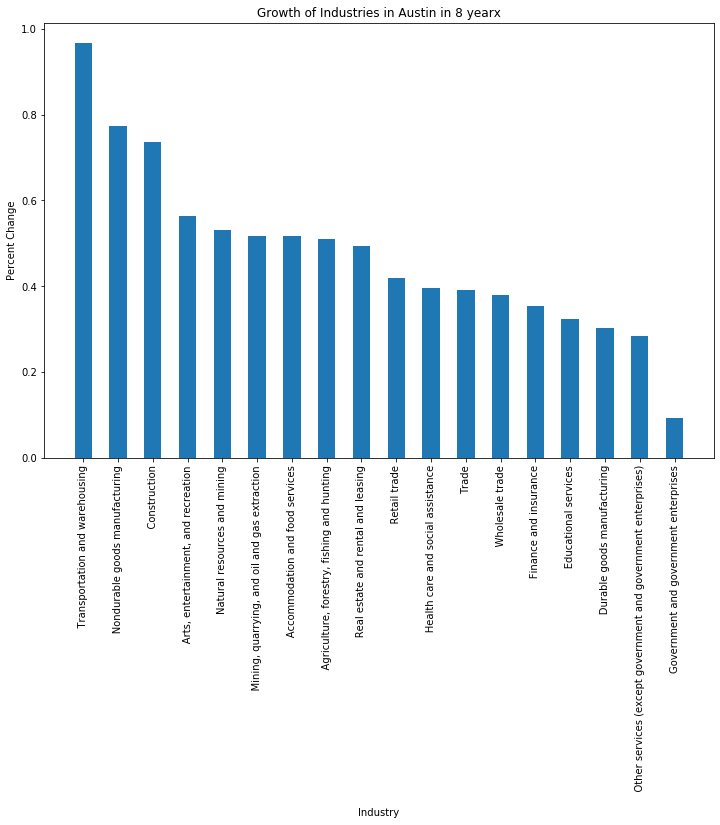

In [13]:
# How much did each industry grew in 8 years

plt.figure(figsize=(12,8))
plt.bar(grow["Description"], grow["% Change from 2010-2018"], width=.5)
plt.xticks(rotation=90)
plt.title("Growth of Industries in Austin in 8 yearx")
plt.xlabel("Industry")
plt.ylabel("Percent Change")
plt.savefig("../Output_Data/Percent Change of Industries.png",dpi=100,bbox_inches='tight')

In [14]:
# Select the categories that changhe the most in 8 years

Nondurable = list(austin.iloc[5,1:10])
Transportation = list(austin.iloc[8,1:10])
construction = list(austin.iloc[3,1:10])

In [15]:
# creat a list of years
year = [2010,2011,2012,2013,2014,2015,2016,2017,2018]

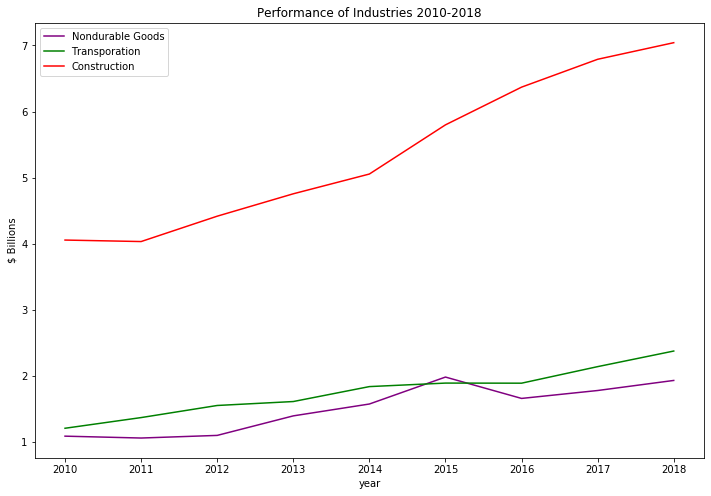

In [16]:
# Plot each category as its own line

plt.figure(figsize=(12,8))
plt.plot(year,Nondurable, label='Nondurable Goods', c='purple')
plt.plot(year, Transportation, label='Transporation', c='g')
plt.plot(year, construction, label='Construction', c='r')
plt.title('Performance of Industries 2010-2018')
plt.xlabel('year')
plt.ylabel('$ Billions')
plt.legend()
plt.savefig("../Output_Data/Performance of Industries.png",dpi=100,bbox_inches='tight')
plt.show()

In [17]:
# What are the best industries in 2018?
best = austin.nlargest(6,["2018"])
best

,Description,2010,2011,2012,2013,2014,2015,2016,2017,2018,% Change from 2010-2018
30,Trade,15.791227,16.663207,17.704701,17.956616,18.228527,19.764588,20.379439,21.481096,21.976612,0.391698
7,Durable goods manufacturing,12.140442,12.837728,11.567345,11.799504,11.691667,12.983886,13.997884,14.984412,15.804048,0.301769
27,Government and government enterprises,13.224761,13.043491,13.134066,13.328014,13.346800,13.637645,14.016491,14.277932,14.434132,0.091447
9,Wholesale trade,10.159799,11.010524,11.846633,11.782009,11.676600,12.891564,13.211915,14.033724,14.005844,0.378555
15,Real estate and rental and leasing,8.206643,8.859805,9.280109,9.763700,11.111467,10.722887,11.152318,11.758098,12.261244,0.494063
10,Retail trade,5.630584,5.652841,5.858068,6.175205,6.554214,6.875430,7.169928,7.448544,7.983229,0.417833


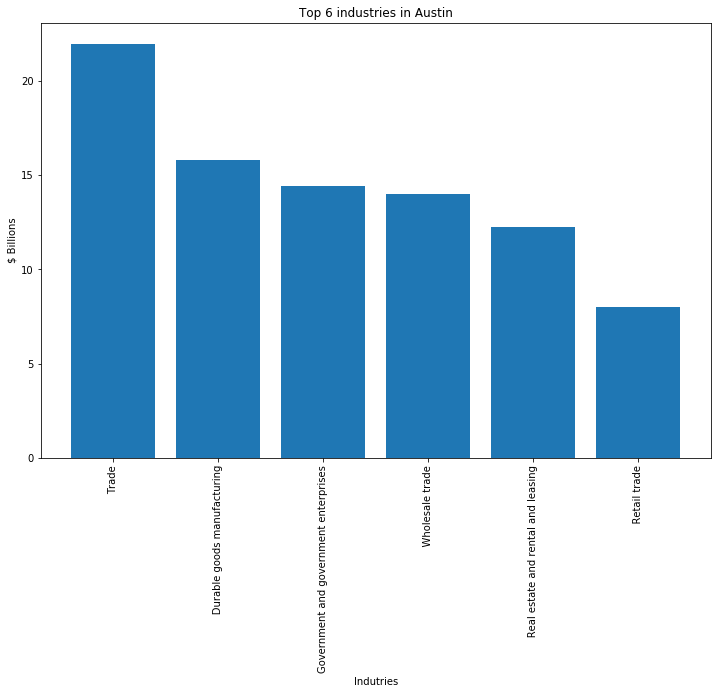

In [18]:
# Graph how are these industries doing over time
# Get the data from "best" and graph how they compare to each other 

best_2018 = best[["Description","2018"]]
best_2018

# Plot
plt.figure(figsize=(12,8))
plt.bar(best_2018["Description"], best_2018["2018"])
plt.title('Top 6 industries in Austin')
plt.xlabel('Indutries')
plt.ylabel('$ Billions')
# plt.ylim(10000000,100000000)
plt.xticks(rotation=90)
plt.savefig("../Output_Data/Top 6.png",dpi=100,bbox_inches='tight')
plt.show()

In [19]:
# Make a line graph to see how these industries did over 8 years

Trade = list(best.iloc[0,1:10])
Durable = list(best.iloc[1,1:10])
Gov = list(best.iloc[2,1:10])
Whole = list(best.iloc[3,1:10])

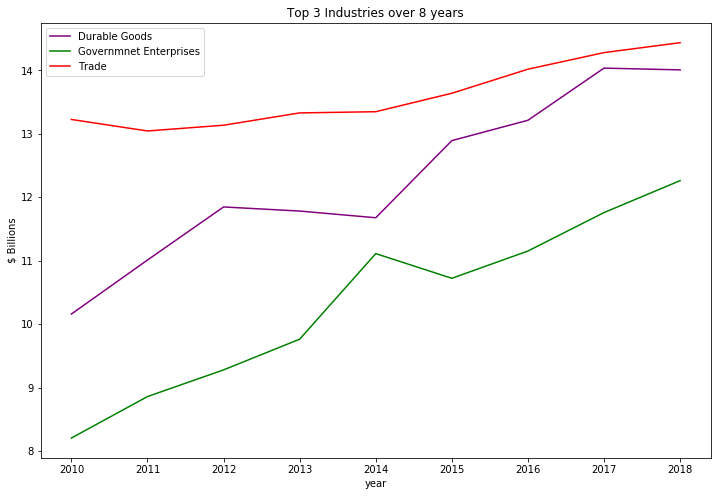

In [21]:
plt.figure(figsize=(12,8))
plt.plot(year,Durable, label='Durable Goods', c='purple')
plt.plot(year, Gov, label='Governmnet Enterprises', c='g')
plt.plot(year, Trade, label='Trade', c='r')
plt.title('Top 3 Industries over 8 years')
plt.xlabel('year')
plt.ylabel('$ Billions')
plt.legend()
plt.savefig("../Output_Data/Top_3 over time.png",dpi=100,bbox_inches='tight')
plt.show()